# Deep Neural Networks 모델 성능 개선 기법들

## 최적화와 과대적합(Overfitting) 과소적합(underfitting)
- **<font size='5'>최적화(Optimization)와 일반화(generalization)</font>**
    - **최적화(Optimization)**
        - train data에서 최고의 성능을 얻으려고 모델 파라미터들을 조정하는 과정 (옵티마이저가 한다.)
    - **일반화(Generalization)**
        - 훈련된 모델이 **처음 보는 데이터**에서 대해 잘 추론할 수 있는 상태. 
        - 학습을 통해 일반화된 특징들을 잘 찾은 상태.
    - **과대적합(Overfitting)**
        - 검증 결과 Train set에 대한 성능은 좋은데 Validation set에 대한 성능은 안좋은 상태로 모델이 **학습을 과하게(overfitting)한** 상태를 말한다.
        - 학습이 과하게 되어 쓸데 없는 패턴을 모두 외워버려 오히려 처음본 데이터에 대한 예측 성능이 떨어진다.
        - 보통 Train dataset의 크기에 비해 모델이 너무 복잡한 경우 발생한다.
        - 보통 과적합이라고 하면 Overfitting을 말한다.
    - **과소적합(Underfitting)**
        - 검증 결과 Train set과 Validation set 모두 성능이 안좋은 상태로 모델의 **학습이 덜(underfitting)된** 상태를 말한다.
        - Train dataset의 크기에 비해 모델이 너무 단순한 해서 데이터에 대한 특징들을 다 찾지 못한 상태이다.

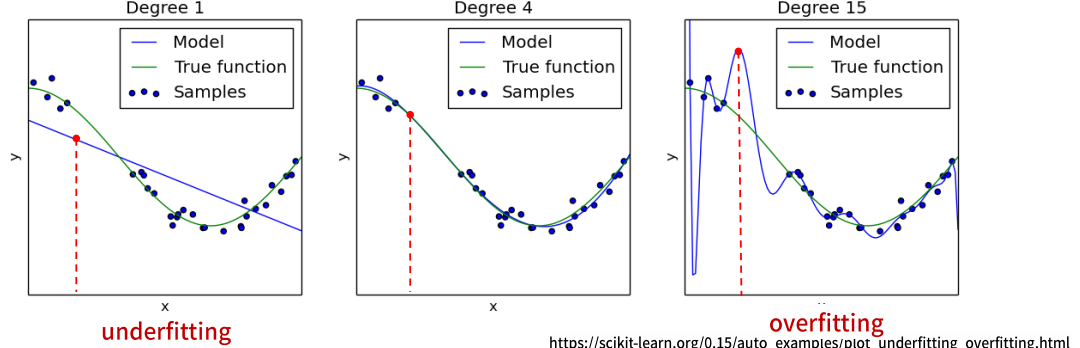

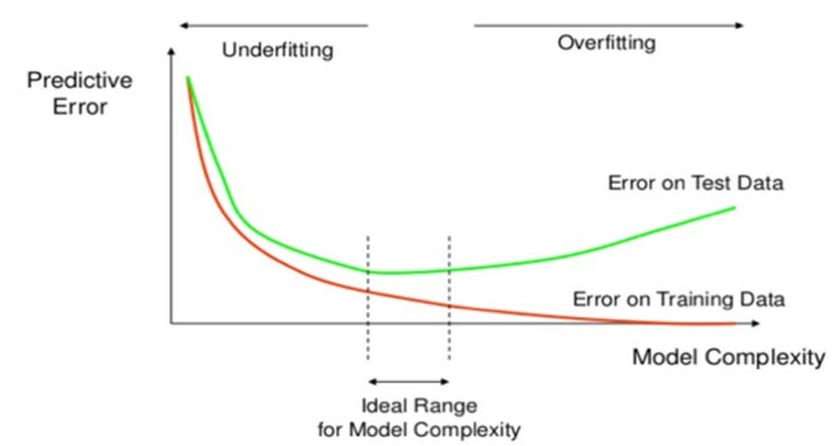


### 과소적합(Underfitting) 개선
- 모델의 복잡도를 높인다.
    - 모델 네트워크의 크기를 키운다. 
        - Layer나 Unit 개수를 늘린다.
- Epoch (또는 Step) 수를 늘린다. 
    - Train/Validation의 성능이 계속 좋아지는 상태에서 끝난 경우 더 학습을 시킨다.

### 과대적합(Overfitting) 개선
- **더 많은 data를 수집**
    - 모델이 복잡해도 학습 시킬 데이터가 충분히 많으면 괜찮다.
    - 일반적으로 데이터를 늘리는데는 시간과 돈이 많이 든다. 단 이미지의 경우 크기를 줄인다거나 회전 시키는 것등의 방식을 통해 데이터를 어느정도 늘릴 수 있다.(Image Augmentation)
- **모델의 복잡도를 낮춰 단순한 모델을 만든다.**
    - 네트워크 모델의 크기를 작게 만든다.
    - 모델의 학습을 규제하는 기법을 적용한다.
- **Epoch(또는 step) 수를 줄인다.**
    - Validation의 성능 지표가 가장 좋았던 Epoch 까지만 학습시킨다.

- <font size="5">과대적합을 방지하기 위한 규제 방식은 모두 모델을 간단하게 만드는 방법들이다.</font>

### Epoch과  과적합
- 데이터셋을 여러번 반복 학습을 하게 되면 **초반에는** train, validation 성능이 모두 개선된다. 그러나 **학습이 계속 반복되면** train 의 성능은 계속 좋아지지만 어느시점 부터는 Overfitting이 발생하여 **validation 의 성능은 나빠진다.**
- Epoch을 반복하는 것은 같은 데이터셋을 반복적으로 학습하는 것이기 때문에 적절한 Epoch수를 넘어가면 Overfitting이 발생한다.
- Validation set의 성능이 나빠지기 전의 반복횟수를 모델의 최적의 Epoch으로 선택한다.

## DNN 모델  크기 변경

- 모델의 layer나 unit 수가 많을 수록 복잡한 모델이 된다.
- Overfitting일 경우 모델을 간단하게 만들고 Underfitting일 경우 모델을 크게 만든다.
    - Layer의 수, 각 layer의 unit 수를 조정 
- 큰 모델에서 시작하여 layer나 unit수를 줄여가며 validation loss의 감소 추세를 관찰한다. (또는 반대로)

- #### 데이터에 비해 작은 모델의 특징
    - Train/Validation 성능 개선의 속도가 느리다.
        - 반복횟수가 충분하지 않으면 학습이 덜된 상태에서 중단될 수 있다.
    - Underfitting이 발생할 가능성이 크다.
    
- #### 데이터에 비해 큰 모델의 특징
    - Validation 이 성능이 학습 초반부터 나빠진다. 
    - Train에 대한 성능은 빠르게 개선된다.
    - Overfitting 발생할 가능성이 크다.

##  Dropout Layer 추가를 통한 Overfitting 규제

- **Neural network의 Overfitting을 방지하기 위한 규제(regularization) 기법**
    - Overfitting의 이유는 모델이 너무 복잡하기 때문이다. 
        - 너무 복잡한 모델은 학습시 Train dataset으로 부터 너무 많은 특징을 찾기 때문에 일반성이 떨어지게 된다.

- **Dropout Node**
    - 학습시 일부 Unit(노드)들을 Random하게 빼고 학습한다. 이때 빠지는 노드들을 Dropout Node라고 한다.
        - 선택된 노드들의 weight들을 모두 0으로 학습시킨다. 이 노드들은 최적화 대상에서 빠진다.
- **Dropout rate**
    - Dropout이 적용되는 Layer에서 Dropout Node의 비율로 보통 0.2~0.5 를 지정한다.
    - 너무 크게 지정하면 underfitting이 발생한다.
- 매 Step 마다 Dropout Node들은 random하게 바뀐다.

- **효과**
    - Dropout은 overfitting의 원인인 co-adaptation 현상을 감소/방지하는 효과가 있다.
    - co-adaptation 현상이란
        - 학습시 생기는 오차를 줄이기 위해 네트워크 내의 모든 Node들의 모든 파라미터들이 업데이트 된다. 발생한 오차에 대해 모든 파라미터가 공동책임으로 업데이트 되는 것이된다. 그래서 각 Node들의 역할이 나눠지지 못하고 공동화되며 그로 인해 쓸데 없는 패턴까지 학습하게 되는 것이 된다. 이것이 overfitting의 원인이 된다.
        - Dropout을 사용하게 되면 학습시 마다 Node들을 학습에서 제외하므로 이런 co-adaptation 현상을 줄여 줄 수 있다.
        
    - Step마다 다른 network를 학습시키는 형태가 되어 앙상블(ensemble) 효과가 있다.

- #### 적용
    - Dropout은 학습시에만 적용하고 검증, 테스트, 새로운 데이터 추론시에는 적용되지 않는다.

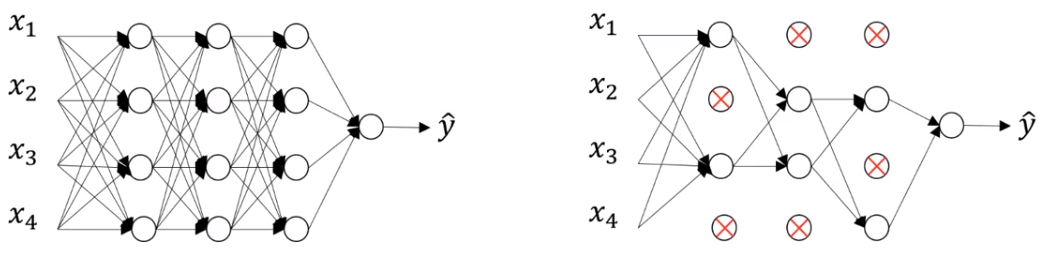

## Batch Normalization (배치정규화)
- 각 Layer 에서 출력된 값을 평균=0, 표준편차=1로 정규화 하여 **각 Layer의 입력분포를 균일하게 만들어 준다.**

### Internal Covariate Shift(내부 공변량 변화) 문제
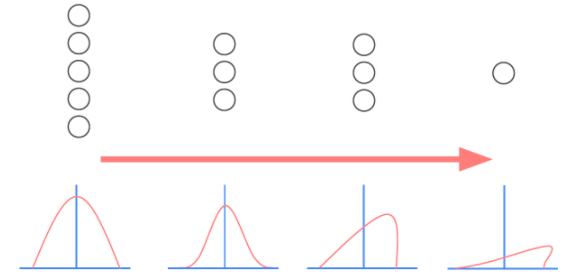
- 내부 공변량 변화란 학습 과정에서 각 층을 통과할 때 마다 입력 데이터 분포가 달라지는 현상이다.
- 입력 데이터의 분포가 정규분포를 따르더라도 레이어를 통과하면서 그 분포가 바뀌어 성능이 떨어지는 문제가 발생한다. 
- 각 레이어를 통과할때 마다 분포를 정규분포로 정규화하여 성능을 올린다.


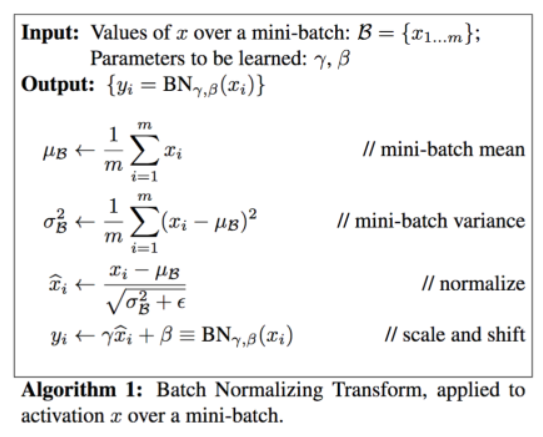

- $\gamma$: scaling 파라미터, $\beta$: shift 파라미터
    - 항상 일정한 분포로 나오는 것을 방지하기 위해 $\gamma$와  $\beta$를 이용해 분포에 약간의 변화를 준다.
    - $\gamma$와  $\beta$는 학습 과정에서 최적화 되는 값이다.

- Batch Normalization은 입력데이터와 파라미터의 가중합을 구한 결과에 적용한 뒤 그 결과를 Activation 함수에 전달한다.
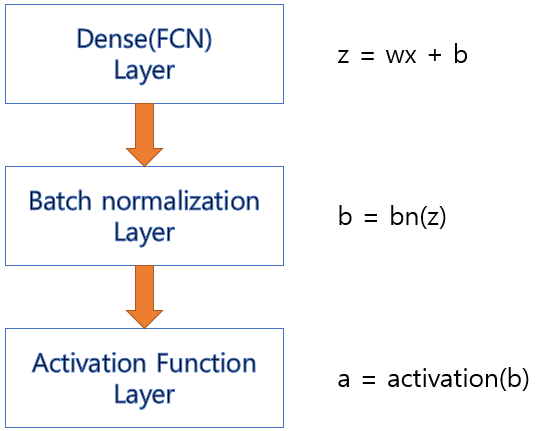

### 효과
- 랜덤하게 생성되는 초기 가중치에 대한 영향력을 줄일 수있다.
- 학습하는 동안 과대적합에 대한 규제의 효과를 준다.
- Gradient Vanishing, Gradient exploding을 막아준다.

## Optimizer의 Learning rate(학습율) 조정을 통한 성능향상
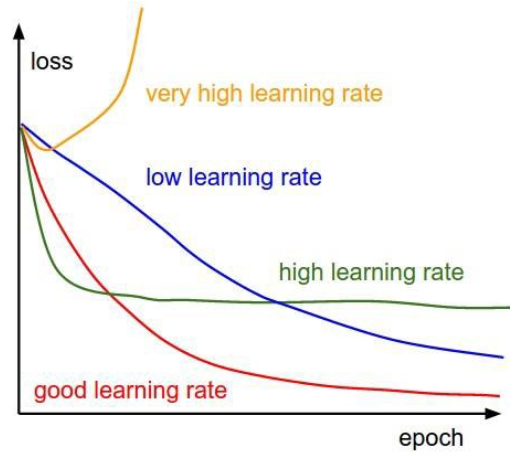
- Optimizer의 Learning rate이 너무 크거나 너무 작으면 최적의 파라미터를 찾지 못할 수 있다. 그래서 Learning rate는 모델 성능과 밀접한 관계가 있는 아주 중요한 Hyper Parameter이다. 
- 학습 하는 동안 고정된 하나의 Learning rate를 사용할 수도 있으나 학습이 반복되는 동안 그 값을 변경하여 성능향상을 꾀핳 수 있다.
    - 어떻게 조정할 지 다양한 알고리즘들이 있다. 대표적인 것은 초기 Learning rate를 크게 잡아주고 step이 진행될 수록 줄여주는 방식이 있다.

### Learning Rate Decay
- 일정한 step 마다 일정한 비율로 Learning rate를 변경
- 보통 초반에는 크게 설정하고 갈수록 줄여주는 방향으로 구현다.
    - 일반적으로 5 에폭마다 절반으로 줄이거나 20 에폭마다 1/10씩 줄이기도 한다.(튜닝대상)

### Callback 을 이용한 조정
- 일정 step동안 검증 성능지표가 향상되지 않으면 그때 learning rate를 조정한다.

> Callback: 학습 도중 특정 이벤트(변화)가 발생하면 호출되도록 정의한 기능

## Hyper parameter tuning

- Parameters
    - 모델이 학습하여 데이터에 가장 적합한 값을 찾아내는 파라미터
        - Weights $W$
        - Bias $b$
- Hyper parameters
    - 모형의 구조를 결정하거나 optimization 방법을 결정하는 변수들로 개발자가 직접 설정하는 파라미터
    - Optimizer의 종류
    - learning rate($\alpha$)
    - Hidden layer의 수 
    - Hidden unit의 수 
    - Iteration의 수 
    - Activation function의 종류
    - Minibatch size 
    - Regularization
    - dropout rate
    - etc..
    
- 다양한 조합의 hyper parameter를 시도해서 loss 함수가 빠르게 감소하는 hyper parameter를 찾아내는 시도가 필요 